[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tselane2110/Applied-Computer-Vision/blob/main/assignment-1/Assignment-1.ipynb)

# Importing the Libraries

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

I will first implement functions to perform all the required tasks in the assignment. Then, when demonstrating the computations, I will call these functions to show the results.

### Function to Display an Image

In [2]:
def show_image(img, title="Image", fs=(5, 5)):
    """
    Displays the input image
    img -> input image
    title -> title of the image
    fs -> figure size
    """
    plt.figure(figsize = fs)
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()

### Function to add gaussian noise to an image

In [3]:
def add_gaussian_noise(img, mean, std):
  """
  Adds gaussian noise to the input image
  img -> input image
  mean -> mean of the gaussian noise
  std -> standard deviation of the gaussian noise
  """
  noise = np.random.normal(mean, std, img.shape)
  noisy_img = img.astype(np.float64) + noise.astype(np.float64)
  noisy_img = np.clip(noisy_img, 0, 255)
  noisy_img = noisy_img.astype(np.uint8)
  return noisy_img

### Function to perform convolution on an image given a 2D-kernel

In [4]:
def convolve(img, kernel, show_padding = True):
  """
  Convolves the input image with the given kernel
  img -> input image
  kernel -> kernel to be used for convolution
  """
  h, w, c = img.shape
  result = np.zeros_like(img, dtype=np.float32)
  n = kernel.shape[0]

  # flipping kernel over x and y axis, for convolution
  #lr (left-right) -> horizontal axis, ud (up-down) -> vertical axis
  flipped_kernel = np.flipud(np.fliplr(kernel))

  # applying zero-padding to the input image
  # we are assuming that the kernel we will use is odd-sized
  p = int((len(kernel)-1)/2)
  padded_img = np.pad(img, ((p, p), (p, p), (0, 0)), 'constant')

  if show_padding == True:
    show_image(padded_img, "Padded Image")

  # performing convolution
  for ch in range(c):          # loop over channels
      for i in range(h):       # loop over rows
          for j in range(w):   # loop over cols
              region = padded_img[i:i+n, j:j+n, ch]
              result[i, j, ch] = np.sum(region * flipped_kernel)

  return np.clip(result, 0, 255).astype(np.uint8)

### function to create a gaussian kernel

In [5]:
def create_gaussian_kernel(size, sigma):
  """
  Creates a gaussian kernel of the given size and sigma
  size -> size of the kernel
  sigma -> standard deviation of the gaussian kernel
  """
  n = size
  half = n // 2

  # Creating coordinate grid from -half to +half
  x = np.arange(-half, half+1)
  y = np.arange(-half, half+1)
  X, Y = np.meshgrid(x, y)

  # creating the kernel
  gaussian_kernel = np.exp(-(X**2 + Y**2) / (2*sigma**2))
  gaussian_kernel /= gaussian_kernel.sum()   # normalize

  return gaussian_kernel

### Function for template-matching

**NOTE:**  I did not use the previously defined convolution function since it was working for 2D kernels and I had to use separate-loops to convolve a 3D kernel, therefore, I chose to define a separate function for it

In [6]:
def template_matching(img, template):
  """
  Performs template matching on the input image
  img -> input image
  template -> template to find in the image
  """
  # Save original for display
  img_display = img.copy()

  # Output np array
  H, W = img.shape[:2]
  h, w = template.shape[:2]
  result = np.zeros((H-h+1, W-w+1))

  # mean-centralized image and kernel
  img = img.astype(np.float32) - np.mean(img, axis=(0,1))
  template = template.astype(np.float32) - np.mean(template, axis=(0,1))

  # applying convolution for template matching
  for i in range(H-h+1):
      for j in range(W-w+1):
          region = img[i:i+h, j:j+w]
          result[i, j] = np.sum(region * template)

  # showing the result of the correlation
  show_image(result, "Response Map R(x,y)")

  # PLOTTING THE RESULT

  # Find index of maximum response
  y, x = np.unravel_index(np.argmax(result), result.shape)
  print(f"Best match at: ({x}, {y})")

  # Show original image
  fig, ax = plt.subplots(1)
  ax.imshow(img_display.astype(np.uint8))  # ensure it's in displayable format

  # Draw rectangle where template matched best
  rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='black', facecolor='none')
  ax.add_patch(rect)

  plt.title("Best Match Found")
  plt.show()

  # # to save the image
  # plt.title("Best Match Found")
  # plt.savefig("matched_result.png")   # saves as PNG
  # plt.close(fig)

### Function to compute gradient over an axis

In [7]:
def compute_gradient(img, axis="x"):
    """
    Compute gradient in x or y direction.
    axis: 'x' or 'y'
    """
    if axis == "x":
        kernel = np.array([[-1, 0, 1],
                           [-1, 0, 1],
                           [-1, 0, 1]])/3
    elif axis == "y":
        kernel = np.array([[-1, -1, -1],
                           [ 0,  0,  0],
                           [ 1,  1,  1]])/3
    else:
        raise ValueError("Axis must be 'x' or 'y'")

    return convolve(img, kernel, show_padding = False)

### Function to compute magnitude of gradient

In [8]:
def compute_gradient_magnitude(Gx, Gy):
    """Compute gradient magnitude from Gx and Gy."""
    return np.sqrt(Gx**2 + Gy**2)

### Function to compute gradient-direction

In [9]:
def compute_gradient_direction(Gx, Gy):
    """Compute gradient direction in radians."""
    return np.arctan2(Gy, Gx)

# SOLUTION FOR THE ASSIGNMENT

### QUESTION 1


Solution to Question#1: 



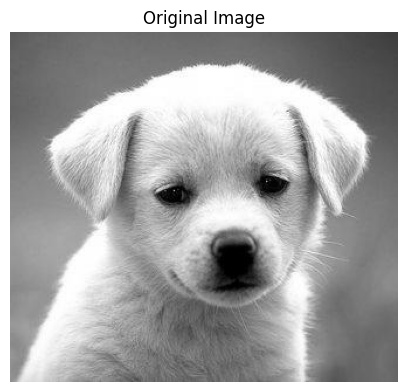

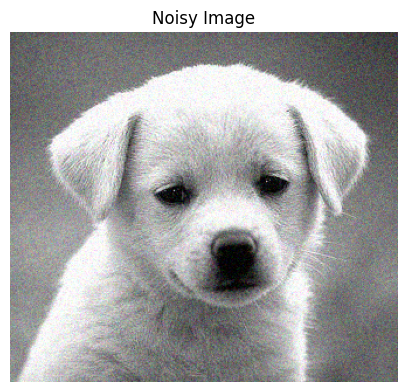

In [10]:
print("\nSolution to Question#1: \n")
img = cv.imread("/content/dog.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
show_image(img, "Original Image")
noisy_img = add_gaussian_noise(img, 0, 15)
show_image(noisy_img, "Noisy Image")

### QUESTION 2


Solution to Question#2: 



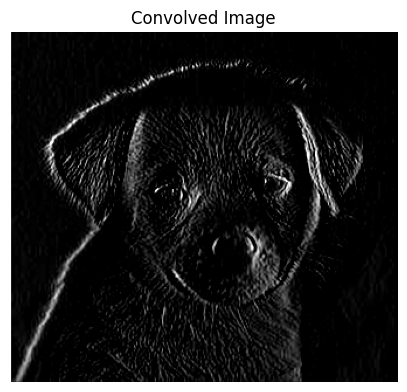

In [11]:
print("\nSolution to Question#2: \n")
Kernel = np.array([[1,0,-1],
                   [2,0,-2],
                   [1,0,-1]])
convolved_img = convolve(img, Kernel, show_padding= False)
show_image(convolved_img, "Convolved Image")

### QUESTION 3


Solution to Question#3: 



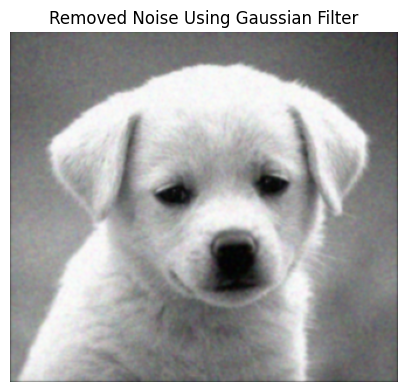

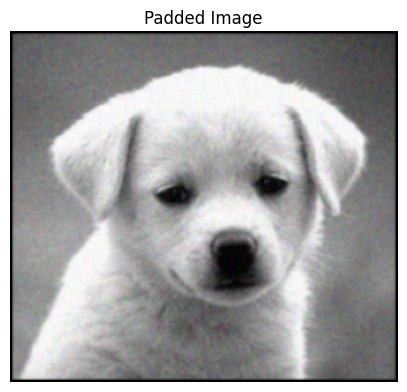

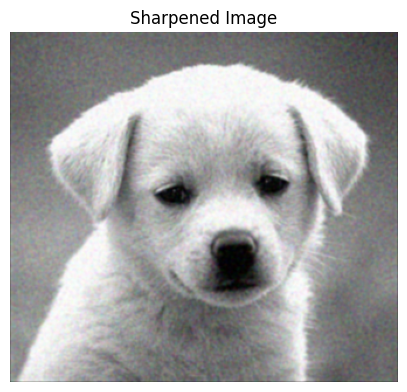

In [12]:
print("\nSolution to Question#3: \n")
gaussian_kernel = create_gaussian_kernel(7, 1)
# show_image(gaussian_kernel, "Gaussian Kernel") # uncomment to display the kernel
less_noisy_img = convolve(noisy_img, gaussian_kernel, show_padding= False)
show_image(less_noisy_img, "Removed Noise Using Gaussian Filter")
sharpening_kernel = np.array([[1, 4, 6, 4, 1],
                              [4, 16, 24, 16, 4],
                              [6, 24, -476, 24, 6],
                              [4, 16, 24, 16, 4],
                              [1, 4, 6, 4, 1], ]) *(-1.0 / 256.0)
sharpened_img = convolve(less_noisy_img, sharpening_kernel)
show_image(sharpened_img, "Sharpened Image")

### QUESTION 4


Solution to Question#4: 



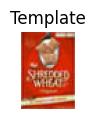

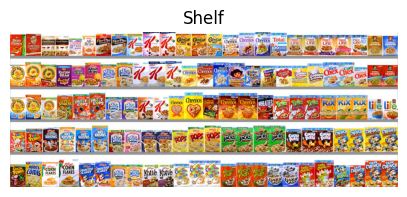

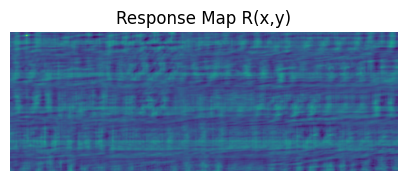

Best match at: (41, 8)


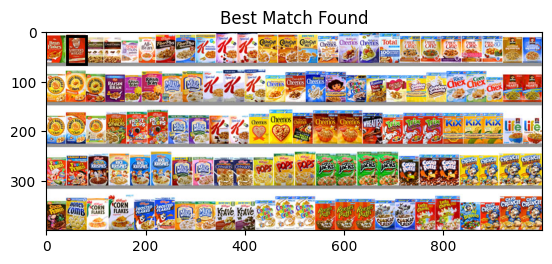

In [13]:
print("\nSolution to Question#4: \n")
template = cv.cvtColor(cv.imread("/content/template.jpg"), cv.COLOR_BGR2RGB)
shelf = cv.cvtColor(cv.imread("/content/shelf.jpg"), cv.COLOR_BGR2RGB)
show_image(template, "Template", (1,1))
show_image(shelf, "Shelf")
# Use the template_matching function
matched_result_img = template_matching(shelf, template)

### QUESTION 5

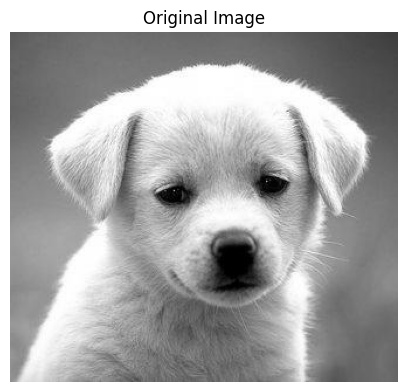

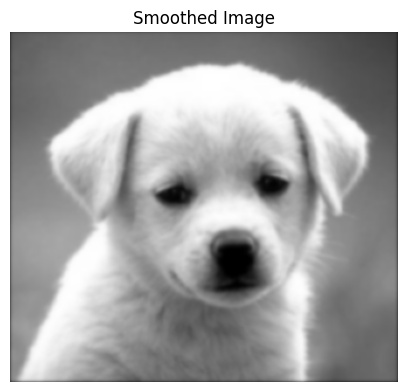

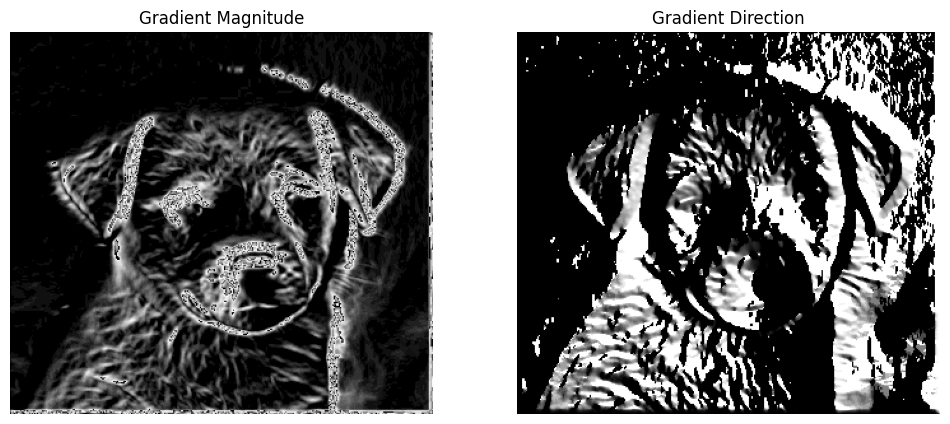

In [14]:
# reading the input image
img = cv.cvtColor(cv.imread("/content/dog.jpg"), cv.COLOR_BGR2RGB)

# displaying the input image
show_image(img, "Original Image")

# creating gaussian filter
gaussian_filter = create_gaussian_kernel(9, 1.4)

# applying gaussian filter on input image
smoothed_img = convolve(img, gaussian_filter, show_padding = False)

# displaying the smoothed image
show_image(smoothed_img, "Smoothed Image")

# computing y-gradient
gy = compute_gradient(smoothed_img, 'y')

# computing x-gradient
gx = compute_gradient(smoothed_img, 'x')

# calculating gradient magnitude
gradient_magnitude = compute_gradient_magnitude(gy, gx)

# calculating gradient direction
gradient_direction = compute_gradient_direction(gy, gx)

# plotting gradient magnitude and gradient direction

# Normalize and cast to float32
grad_mag_norm = (gradient_magnitude / np.max(gradient_magnitude)).astype(np.float32)
grad_dir_norm = ((gradient_direction - np.min(gradient_direction)) /
                 (np.max(gradient_direction) - np.min(gradient_direction))).astype(np.float32)

# plotting gradient magnitude and gradient direction
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(grad_mag_norm, cmap="gray")
ax[0].set_title("Gradient Magnitude")
ax[1].imshow(grad_dir_norm, cmap="hsv")  # use HSV for direction
ax[1].set_title("Gradient Direction")
for a in ax: a.axis("off")
plt.show()